# DFAnalyzer Simple Example

This notebook will guide you to load a trace file generated by DFTracer and analyze the trace events using Dask.

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## System imports for the notebook

In [12]:

import os
from pathlib import Path
import sys

## We add the analysis code to path so that we can run this in dev mode.

In [13]:
app_root = str(Path(os.getcwd()).parent.parent)
sys.path.insert(0, app_root)

## Imports for the notebook

This may take some time as it initializes Dask.

In [14]:
# Importing DFAnalyzer
import dfanalyzer
print(dfanalyzer.__file__)
from dfanalyzer.main import DFAnalyzer, update_dft_configuration, setup_logging, setup_dask_cluster, reset_dask_cluster

/usr/WS2/haridev/dftracer-new/dfanalyzer/__init__.py


## Initialize DFAnalyzer Configuration

In this function, we can tune DFAnalyzer for the analysis. For example, we can tune number of workers, connect to existing dask cluster, etc.

In [15]:
conf = update_dft_configuration(verbose=True, workers=4, log_file=f"./df_{os.getenv('USER')}.log")

## This methods sets up logging for DFAnalyzer.

This is needed for debugging and progress tracking. All prints seen in the following cells are configured in this method.

In [16]:
setup_logging()

## Setup dask cluster.

In this example, we use Dask Local cluster which will use multiprocessing on the same node where the notebook is running to run its workers.

**NOTE:** If your running on Remote VSCode on a cluster, you can tunnel the port and open it locally.

In [17]:
setup_dask_cluster()

[INFO] [09:00:20] Initialized Client with 4 workers and link http://127.0.0.1:35477/status [/usr/WS2/haridev/dftracer-new/dfanalyzer/main.py:794]


2025-10-16 09:00:20,359 - distributed.nanny - WARNING - Restarting worker
2025-10-16 09:00:20,396 - distributed.nanny - WARNING - Restarting worker
2025-10-16 09:00:20,446 - distributed.nanny - WARNING - Restarting worker
2025-10-16 09:00:20,487 - distributed.nanny - WARNING - Restarting worker


On clicking the link, you will see a daskboard like this. [Dask Daskboard Image](images/dask-dashboard-load.png)

## Reset Dask Cluster

In case you have an error and want to clean the cluster for fresh analysis. You can run this.

In [18]:
reset_dask_cluster()

[INFO] [09:00:22] Restarting all workers [/usr/WS2/haridev/dftracer-new/dfanalyzer/main.py:782]


## Load the DFAnalyzer Trace

The DFAnalyzer class take a regex string as input. For example, "{app_root}/examples/dfanalyzer/*.pfw.gz"

In [19]:
analyzer = DFAnalyzer(f"{os.getcwd()}/*.gz")

[INFO] [09:00:24] Created index for 1 files [/usr/WS2/haridev/dftracer-new/dfanalyzer/main.py:445]
[INFO] [09:00:26] Total size of all files total_size=18057457 [/usr/WS2/haridev/dftracer-new/dfanalyzer/main.py:448]
[INFO] [09:00:26] Loading batches, num batches=18, num files=1, total lines=18057457 [/usr/WS2/haridev/dftracer-new/dfanalyzer/main.py:462]
[INFO] [09:00:30] Loaded events [/usr/WS2/haridev/dftracer-new/dfanalyzer/main.py:532]
[INFO] [09:00:30] Loaded plots with slope threshold: 45 [/usr/WS2/haridev/dftracer-new/dfanalyzer/main.py:538]


## Analyze the events

1. The dask dataframe is stored at `analyzer.events`. 
2. We can run dask queries on this dataframe.

In [20]:
analyzer.events.head()

,name,cat,type,pid,tid,hhash,ts,te,dur,tinterval,trange,compute_time,io_time,app_io_time,total_time,fhash,phase,size,hash,value
5,start,dftracer,0,380010,380010,2dbbcec2c820dc4c,0,0,0,<NA>,0,<NA>,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,<NA>
6,DLIOBenchmark.__init__,dlio_benchmark,0,380010,380010,2dbbcec2c820dc4c,1178965,1179368,403,<NA>,1,<NA>,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,<NA>
7,FileStorage.get_uri,storage,0,380010,380010,2dbbcec2c820dc4c,1248620,1248627,7,<NA>,1,<NA>,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,<NA>
9,opendir,POSIX,0,380010,380010,2dbbcec2c820dc4c,1248672,1251678,3006,<NA>,1,<NA>,3006,<NA>,3006,a1c36fa8cc0eeb8f,2,<NA>,<NA>,<NA>
10,FileStorage.walk_node,storage,0,380010,380010,2dbbcec2c820dc4c,1248590,1255311,6721,<NA>,1,<NA>,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,<NA>


In [21]:
analyzer.file_hash.head()

,name,pid,tid,hhash
hash,,,,
008c310ba1400cf1,/p/lustre3/iopp/gitlab-runner-data/resnet50/da...,380010,380010,2dbbcec2c820dc4c
00d7da2c7a486023,/p/lustre3/iopp/gitlab-runner-data/resnet50/da...,380010,380010,2dbbcec2c820dc4c
00ee84176f024a31,/p/lustre3/iopp/gitlab-runner-data/resnet50/da...,380010,380010,2dbbcec2c820dc4c
01419a1cadce721a,/p/lustre3/iopp/gitlab-runner-data/resnet50/da...,380010,380010,2dbbcec2c820dc4c
014f114d295585b9,/p/lustre3/iopp/gitlab-runner-data/resnet50/da...,380010,380010,2dbbcec2c820dc4c


In [22]:
analyzer.host_hash.head()

,name,pid,tid,hhash
hash,,,,
2dbbcec2c820dc4c,corona183,380010,380010,2dbbcec2c820dc4c


### Summary 

DFAnalyzer supports a summary utility that gives a brief summary of the job and its I/O access behavior.

In [23]:
analyzer.metadata.head()

,name,value,pid,tid,hhash
1,380010,thread_name,380010,380010,2dbbcec2c820dc4c


In [24]:
items = analyzer.summary()
items

[INFO] [09:01:06] Total number of events in the workload are 74353 [/usr/WS2/haridev/dftracer-new/dfanalyzer/main.py:644]


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  Allocation    Scheduler Allocation Details                                                                     │
│                ├── Nodes: 1                                                                                     │
│                ├── Processes: 1                                                                                 │
│                ├── Thread allocations across nodes (includes dynamically created threads)                       │
│                │   ├── Compute: 0                                                                               │
│                │   └── I/O: 25                                                                                  │
│                └── Events Recorded: 74K                                                                         │
│  Dataset       Description of Dataset Used                                                                      │
│                └── Files: 1028                                                                                  │
│  I/O Behavior  Behavior of Application                                                                          │
│                ├── Split of Time in application                                                                 │
│                │   ├── Total Time: 179.811 sec                                                                  │
│                │   └── Overall I/O: 6.667 sec                                                                   │
│                └── Metrics by function                                                                          │
│                    ├── Function       |count |                  size                   |                        │
│                    ├──                |      |min   |25    |mean  |median|75    |max   |                        │
│                    ├── opendir        |2     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── __xstat64      |2     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── fork           |4     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── access         |1K    |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── open           |128   |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── pread          |70K   |122KB |256KB |256KB |256KB |256KB |256KB |                        │
│                    └── close          |128   |NA    |nan   |nan   |NA    |nan   |NA    |                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

### Timeline plots

We support two timeline plots:
1. how I/O time and I/O bandwidth changes over time.
2. how transfer size changes over time.

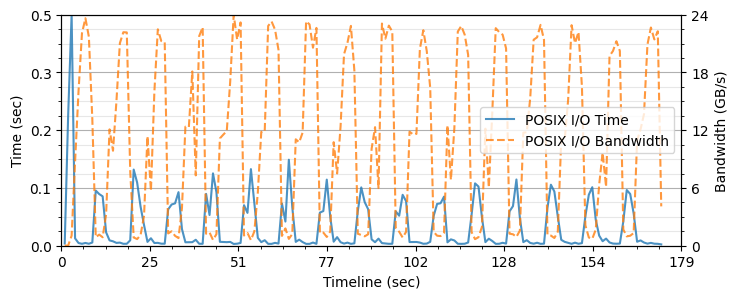

In [25]:
fig, ax1, ax2 = analyzer.plots.time_bw_timeline(
    bw_unit='gb',
    figsize=(8, 3),
    line1_label='POSIX I/O Time',
    line2_label='POSIX I/O Bandwidth',
    time_col='io_time',
    x_num_ticks=8,
    y_num_ticks=5,
)

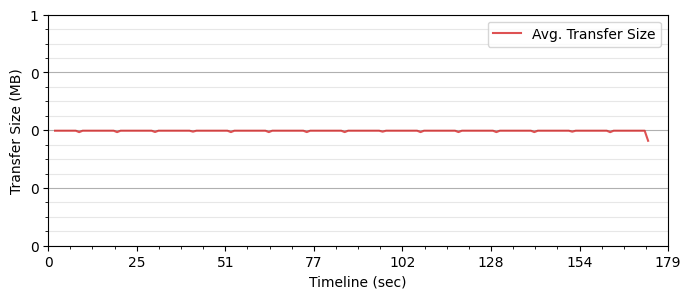

In [26]:
fig, ax = analyzer.plots.xfer_size_timeline(
    figsize=(8, 3),
    unit='mb',
    x_num_ticks=8,
)